<a href="https://colab.research.google.com/github/AlexandreMaestroni/AlexandreMaestroni.github.io/blob/master/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this question we are trying to classify images into real or fakes, I used parts of code found in Kaggle from gpiosenka and deveshupreti. I tried to understand and improve these code.

In [94]:
import pandas as pd
import numpy as np
import cv2
import PIL

Import of the different libraries.

In [97]:
import zipfile

zip_file_path = "KAGGLE.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("</content/KAGGLE_unziped>")

print("Extraction complete.")


Extraction complete.



This code imports the zipfile module, opens a zip file named "KAGGLE.zip", extracts its contents to the specified directory, and prints a message indicating the completion of the extraction process.

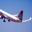

In [98]:
PIL.Image.open('</content/KAGGLE_unziped>/train/FAKE/1099.jpg')

This code provide us a fake image.

In [99]:
image = cv2.imread('</content/KAGGLE_unziped>/train/FAKE/1099.jpg')
image.shape

(32, 32, 3)

And its shape to create our own code.

In [100]:
train_path_fake =[]

base_1 = '</content/KAGGLE_unziped>/train/FAKE/'

for i in range(1000,6000):
    a = '{}{}.jpg'.format(base_1, i)
    train_path_fake.append(a)

for i in range(1000,6000):
    for j in range(2,11):
        b = '{}{} ({}).jpg'.format(base_1, i, j)
        train_path_fake.append(b)
len(train_path_fake)

50000

This code generates a list of file paths for training data, consisting of fake images, by combining the base directory path "</content/KAGGLE_unziped>/train/FAKE/" with varying image file names and their corresponding numbers and extensions, resulting in a total of 50,000 file paths.

In [101]:
df_train_fake = pd.DataFrame(train_path_fake)
df_train_fake.columns = ['path']
df_train_fake['label'] = 0
df_train_fake.head()

,path,label
0,</content/KAGGLE_unziped>/train/FAKE/1000.jpg,0
1,</content/KAGGLE_unziped>/train/FAKE/1001.jpg,0
2,</content/KAGGLE_unziped>/train/FAKE/1002.jpg,0
3,</content/KAGGLE_unziped>/train/FAKE/1003.jpg,0
4,</content/KAGGLE_unziped>/train/FAKE/1004.jpg,0


his code creates a DataFrame df_train_fake from the train_path_fake list, assigns the column name 'path', adds a new column 'label' with a value of 0 for all rows, and displays the first few rows of the DataFrame.

In [102]:
train_path_real=[]

base_2 = '</content/KAGGLE_unziped>/train/REAL/'

for i in range(0,10):
    c = '{}000{}.jpg'.format(base_2, i)
    train_path_real.append(c)

for i in range(0,10):
    for j in range(2,11):
        d = '{}000{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(d)
len(train_path_real)

100

This code generates a list of file paths for training data, consisting of real images, by combining the base directory path "</content/KAGGLE_unziped>/train/REAL/" with varying image file names and their corresponding numbers and extensions, resulting in a total of 100 file paths.

In [103]:
for i in range(10,100):
    e = '{}00{}.jpg'.format(base_2, i)
    train_path_real.append(e)


for i in range(10,100):
    for j in range(2,11):
        f = '{}00{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(f)
len(train_path_real)

1000

This code extends the existing list of file paths for training data, consisting of real images, by including additional image file paths with numbers ranging from 10 to 99, along with variations of the file names using a nested loop, resulting in a total of 900 additional file paths.

In [104]:
for i in range(100,1000):
    g = '{}0{}.jpg'.format(base_2, i)
    train_path_real.append(g)

for i in range(100,1000):
    for j in range(2,11):
        h = '{}0{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(h)
len(train_path_real)

10000

This code further extends the list of file paths for training data, consisting of real images, by including additional image file paths with numbers ranging from 100 to 999, along with variations of the file names using a nested loop, resulting in a total of 9,000 additional file paths.

In [105]:
for i in range(1000,5000):
    k = '{}{}.jpg'.format(base_2, i)
    train_path_real.append(k)

for i in range(1000,5000):
    for j in range(2,11):
        l = '{}{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(l)
len(train_path_real)

50000

This code further extends the list of file paths for training data, consisting of real images, by including additional image file paths with numbers ranging from 1000 to 4999, along with variations of the file names using a nested loop, resulting in a total of 40,000 additional file paths.

In [106]:
df_train_real = pd.DataFrame(train_path_real)
df_train_real.columns = ['path']
df_train_real['label'] = 1
df_train_real.head()

,path,label
0,</content/KAGGLE_unziped>/train/REAL/0000.jpg,1
1,</content/KAGGLE_unziped>/train/REAL/0001.jpg,1
2,</content/KAGGLE_unziped>/train/REAL/0002.jpg,1
3,</content/KAGGLE_unziped>/train/REAL/0003.jpg,1
4,</content/KAGGLE_unziped>/train/REAL/0004.jpg,1


This code creates a DataFrame df_train_real from the train_path_real list, assigns the column name 'path', adds a new column 'label' with a value of 1 for all rows, and displays the first few rows of the DataFrame.

In [107]:
df_train = pd.concat((df_train_fake, df_train_real), axis = 0 )
print(df_train.shape)
df_train.sample(5)

(100000, 2)


,path,label
10255,</content/KAGGLE_unziped>/train/REAL/1255.jpg,1
5197,</content/KAGGLE_unziped>/train/FAKE/1021 (10)...,0
3668,</content/KAGGLE_unziped>/train/REAL/0296 (6).jpg,1
29193,</content/KAGGLE_unziped>/train/REAL/2688 (3).jpg,1
9305,</content/KAGGLE_unziped>/train/FAKE/1478 (5).jpg,0



This code concatenates the DataFrames df_train_fake and df_train_real along the row axis to create a new DataFrame df_train, prints its shape, and displays a random sample of 5 rows from the DataFrame.

In [108]:
image_df = []
for image in df_train['path']:
    img = cv2.imread(image)
    resized = cv2.resize(img,(32,32))
    image_df.append(resized)
image_array = np.array(image_df)
X_train = image_array/255
X_train.ndim

4

This code reads and resizes images from the file paths in the DataFrame df_train, stores them in a list image_df, converts the list to a NumPy array, normalizes the pixel values by dividing by 255, and determines the number of dimensions of the resulting array X_train.

In [109]:
y_train = df_train['label']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

This code assigns the 'label' column from the DataFrame df_train to the variable y_train and displays the first few values of y_train.

In [110]:
test_path_fake =[]

base_3 = '</content/KAGGLE_unziped>/test/FAKE/'

for i in range(0,1000):
    m = '{}{}.jpg'.format(base_3, i)
    test_path_fake.append(m)
    
for i in range(0,1000):
    for j in range(2,11):
        n = '{}{} ({}).jpg'.format(base_3, i, j)
        test_path_fake.append(n)
len(test_path_fake)

10000

This code generates a list of file paths for test data, consisting of fake images, by combining the base directory path "</content/KAGGLE_unziped>/test/FAKE/" with varying image file names and their corresponding numbers and extensions, resulting in a total of 10,000 file paths.

In [111]:
df_test_fake = pd.DataFrame(test_path_fake)
df_test_fake.columns = ['path']
df_test_fake['label'] = 0
df_test_fake.head()

,path,label
0,</content/KAGGLE_unziped>/test/FAKE/0.jpg,0
1,</content/KAGGLE_unziped>/test/FAKE/1.jpg,0
2,</content/KAGGLE_unziped>/test/FAKE/2.jpg,0
3,</content/KAGGLE_unziped>/test/FAKE/3.jpg,0
4,</content/KAGGLE_unziped>/test/FAKE/4.jpg,0


This code creates a DataFrame df_test_fake from the test_path_fake list, assigns the column name 'path', adds a new column 'label' with a value of 0 for all rows, and displays the first few rows of the DataFrame.

In [112]:
test_path_real =[]

base_4 = '</content/KAGGLE_unziped>/test/REAL/'

for i in range(0,10):
    o = '{}000{}.jpg'.format(base_4, i)
    test_path_real.append(o)

for i in range(0,10):
    for j in range(2,11):
        p = '{}000{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(p)
len(test_path_real)

100

This code generates a list of file paths for test data, consisting of real images, by combining the base directory path "</content/KAGGLE_unziped>/test/REAL/" with varying image file names and their corresponding numbers and extensions, resulting in a total of 100 file paths.






In [113]:
for i in range(10,100):
    q = '{}00{}.jpg'.format(base_4, i)
    test_path_real.append(q)

for i in range(10,100):
    for j in range(2,11):
        r = '{}00{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(r)
len(test_path_real) 

1000

This code extends the existing list of file paths for test data, consisting of real images, by including additional image file paths with numbers ranging from 10 to 99, along with variations of the file names using a nested loop, resulting in a total of 900 additional file paths.

In [114]:
for i in range(100,1000):
    s = '{}0{}.jpg'.format(base_4, i)
    test_path_real.append(s)
    
for i in range(100,1000):
    for j in range(2,11):
        t = '{}0{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(t)
len(test_path_real)

10000

This code further extends the list of file paths for test data, consisting of real images, by including additional image file paths with numbers ranging from 100 to 999, along with variations of the file names using a nested loop, resulting in a total of 9,000 additional file paths.

In [115]:
df_test_real = pd.DataFrame(test_path_real)
df_test_real.columns = ['path']
df_test_real['label'] = 1
df_test_real.head()

,path,label
0,</content/KAGGLE_unziped>/test/REAL/0000.jpg,1
1,</content/KAGGLE_unziped>/test/REAL/0001.jpg,1
2,</content/KAGGLE_unziped>/test/REAL/0002.jpg,1
3,</content/KAGGLE_unziped>/test/REAL/0003.jpg,1
4,</content/KAGGLE_unziped>/test/REAL/0004.jpg,1


This code creates a DataFrame df_test_real from the test_path_real list, assigns the column name 'path', adds a new column 'label' with a value of 1 for all rows, and displays the first few rows of the DataFrame.

In [116]:
df_test = pd.concat((df_test_fake, df_test_real), axis = 0 )
print(df_test.shape)
df_test.sample(5)

(20000, 2)


,path,label
9054,</content/KAGGLE_unziped>/test/FAKE/894 (10).jpg,0
2299,</content/KAGGLE_unziped>/test/FAKE/144 (5).jpg,0
3534,</content/KAGGLE_unziped>/test/REAL/0281 (7).jpg,1
6014,</content/KAGGLE_unziped>/test/REAL/0557 (3).jpg,1
4614,</content/KAGGLE_unziped>/test/FAKE/401 (7).jpg,0


This code concatenates the DataFrames df_test_fake and df_test_real along the row axis to create a new DataFrame df_test, prints its shape, and displays a random sample of 5 rows from the DataFrame.

In [117]:
image_ds = []
image_paths = df_test['path']

for image in image_paths:
    imge = cv2.imread(image)
    
    if imge is None:
        print(f"Failed to read image: {image}")
        continue
    
    if imge.size == 0:
        print(f"Empty image: {image}")
        continue
    
    resize = cv2.resize(imge, (32, 32))
    image_ds.append(resize)

image_array = np.array(image_ds)

This code reads and resizes images from the file paths in the DataFrame df_test, checks for any failed or empty images, skips them, and stores the resized images in a list image_ds. Finally, it converts the list to a NumPy array image_array.

In [118]:
image_ds = []
image_paths = df_test['path']

blank_image = np.zeros((32, 32, 3), dtype=np.uint8)  # Create a blank image of shape (32, 32, 3)

for image in image_paths:
    try:
        imge = cv2.imread(image)
        resize = cv2.resize(imge, (32, 32))
        image_ds.append(resize)
    except Exception as e:
        print(f"Error processing image: {image} - {str(e)}")
        image_ds.append(blank_image)  # Append the blank image instead
        continue

image_array = np.array(image_ds)

This code reads and resizes images from the file paths in the DataFrame df_test, and if there is an error during image processing, it prints an error message, appends a blank image of shape (32, 32, 3) to the image_ds list, and continues to the next image. Finally, it converts the image_ds list to a NumPy array image_array.

In [119]:
X_test = image_array/255
X_test.ndim

4


This code normalizes the pixel values in the image_array by dividing them by 255 to scale them between 0 and 1, and then determines the number of dimensions of the resulting array X_test.

In [120]:
y_test = df_test['label']
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

This code assigns the 'label' column from the DataFrame df_test to the variable y_test and displays the first few values of y_test.

In [121]:
from tensorflow.keras import models , layers

model = models.Sequential([
    layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(2,activation = 'sigmoid'),
                         ])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
3125/3125 [==============================] - 235s 75ms/step - loss: 0.3795 - accuracy: 0.8282
Epoch 2/5
3125/3125 [==============================] - 231s 74ms/step - loss: 0.2558 - accuracy: 0.8952
Epoch 3/5
3125/3125 [==============================] - 235s 75ms/step - loss: 0.2191 - accuracy: 0.9123
Epoch 4/5
3125/3125 [==============================] - 233s 74ms/step - loss: 0.2004 - accuracy: 0.9196
Epoch 5/5
3125/3125 [==============================] - 233s 74ms/step - loss: 0.1872 - accuracy: 0.9253


This code defines a sequential model using the Keras API from TensorFlow. The model consists of several layers including convolutional layers, max pooling layers, a flatten layer, and dense layers. It uses the 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' metric for compilation. The model is then trained on the training data X_train and y_train for 5 epochs using the fit function.

In [122]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 11s 16ms/step - loss: 0.2029 - accuracy: 0.9175


[0.20294874906539917, 0.9175000190734863]

This code evaluates the trained model on the test data X_test and y_test using the evaluate function. It calculates the loss value and the accuracy of the model on the test data.

In [123]:
y_pred  = model.predict(X_test)

625/625 [==============================] - 13s 20ms/step


This code predicts the output labels for the test data X_test using the trained model model and assigns the predicted labels to the variable y_pred.

In [124]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[0, 0, 0, 0, 0]

This code converts the predicted probabilities y_pred into predicted labels by selecting the index of the highest probability using np.argmax() function, and assigns the predicted labels to the variable y_pred_label. It then displays the first 5 predicted labels.

In [125]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred_label))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.95      0.88      0.91     10000
           1       0.89      0.95      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



This code imports the classification_report function from the sklearn.metrics module and then generates a classification report by comparing the true labels y_test with the predicted labels y_pred_label. The classification report provides precision, recall, F1-score, and support for each class in the classification problem.

In [126]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred_label)

This code imports the confusion_matrix function from the sklearn.metrics module and then calculates the confusion matrix by comparing the true labels y_test with the predicted labels y_pred_label. The confusion matrix provides a tabular representation of the performance of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions for each class. The resulting confusion matrix is assigned to the variable cm.

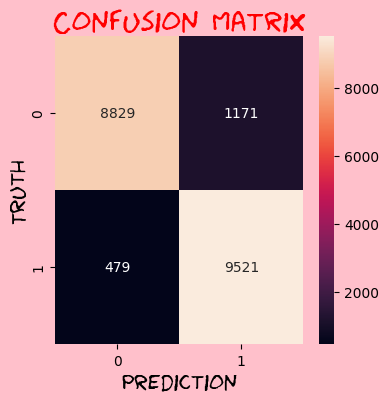

In [127]:
import matplotlib.pyplot as plt
import seaborn as sn


plt.figure(figsize=(4,4), facecolor= 'pink', edgecolor='brown')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'black','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'black','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'red','size':20})
plt.show()

This code imports the pyplot module from matplotlib library as plt and the heatmap function from the seaborn library as sn. It creates a figure with a specified size and background color. It then plots a heatmap of the confusion matrix cm using sn.heatmap with annotations enabled (annot=True) and the number format as integer (fmt="d"). It sets labels for the x-axis and y-axis, and adds a title to the plot. Finally, it displays the plot using plt.show(). The resulting plot is a visual representation of the confusion matrix.